In [23]:
# import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from scipy.stats import linregress
import scipy.stats as st
from scipy.stats import linregress
from datetime import datetime
import calendar

In [24]:
# convert dataset to Pandas DataFrame and reduce columns to relevant information

data = pd.read_csv('Resources/COVID_staff_shortages.csv')
df = pd.DataFrame(data[['state', 'date', 'critical_staffing_shortage_today_yes', 'critical_staffing_shortage_today_no',
          'critical_staffing_shortage_today_not_reported', 'hospital_onset_covid', 'hospital_onset_covid_coverage',
          'inpatient_beds', 'inpatient_beds_used', 'inpatient_beds_used_covid', 'staffed_adult_icu_bed_occupancy',
          'staffed_icu_adult_patients_confirmed_covid', 'total_adult_patients_hospitalized_confirmed_covid',
          'total_pediatric_patients_hospitalized_confirmed_covid', 'total_staffed_adult_icu_beds',
          'inpatient_beds_utilization', 'percent_of_inpatients_with_covid', 'inpatient_bed_covid_utilization',
          'adult_icu_bed_covid_utilization', 'adult_icu_bed_utilization', 'geocoded_state', 'deaths_covid',
          'icu_patients_confirmed_influenza', 'total_patients_hospitalized_confirmed_influenza',
          'total_patients_hospitalized_confirmed_influenza_and_covid', 'all_pediatric_inpatient_bed_occupied',
          'staffed_icu_pediatric_patients_confirmed_covid', 'total_staffed_pediatric_icu_beds']])

# Hypotheses for section 1

## 1.1) Staffing Shortages across Seasons

Null 1-1: There was no relationship between seasons and staffing shortage.
Alternative 1-1: There was a relationship between the season and staffing shortages.

## 1.2)  Staffing Shortages and Day of the Year

Null 1-2: There was no relationship between day of year and staffing shortages.
Alternative 1-2: There was a relationship between the day of year and staffing shortages.

## 1.3) Staffing Shortages and Days of the Week

Null 1-3: There was no relationship between days of the week and staffing shortages.
Alternative 1-3: There was a relationship between days of the week and staffing shortages.

In [25]:
df[['year', 'month','day']] = df['date'].str.split('/', 2, expand=True)
df

,state,date,critical_staffing_shortage_today_yes,critical_staffing_shortage_today_no,critical_staffing_shortage_today_not_reported,hospital_onset_covid,hospital_onset_covid_coverage,inpatient_beds,inpatient_beds_used,inpatient_beds_used_covid,...,deaths_covid,icu_patients_confirmed_influenza,total_patients_hospitalized_confirmed_influenza,total_patients_hospitalized_confirmed_influenza_and_covid,all_pediatric_inpatient_bed_occupied,staffed_icu_pediatric_patients_confirmed_covid,total_staffed_pediatric_icu_beds,year,month,day
0,ME,2021/01/23,1,30,8,3.0,38,3229.0,2231.0,219.0,...,1.0,0.0,1.0,3.0,174.0,NaN,60.0,2021,01,23
1,SD,2021/01/23,2,60,3,27.0,62,2868.0,1641.0,152.0,...,1.0,0.0,3.0,0.0,291.0,NaN,83.0,2021,01,23
2,MD,2021/01/22,2,57,1,31.0,59,11827.0,9635.0,2039.0,...,33.0,0.0,1.0,0.0,648.0,NaN,240.0,2021,01,22
3,RI,2021/01/22,6,8,1,6.0,14,2402.0,2445.0,399.0,...,6.0,0.0,0.0,1.0,635.0,NaN,93.0,2021,01,22
4,ID,2021/01/21,4,40,8,0.0,51,3694.0,2268.0,248.0,...,4.0,0.0,5.0,2.0,273.0,NaN,230.0,2021,01,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54006,MT,2021/03/29,6,58,1,3.0,64,2938.0,1762.0,52.0,...,0.0,0.0,0.0,0.0,45.0,NaN,18.0,2021,03,29
54007,NJ,2021/03/09,9,61,8,76.0,77,21569.0,15395.0,2008.0,...,17.0,5.0,37.0,4.0,365.0,NaN,107.0,2021,03,09
54008,NM,2021/05/19,12,43,1,2.0,55,4446.0,3181.0,163.0,...,2.0,1.0,3.0,0.0,36.0,NaN,0.0,2021,05,19
54009,NE,2021/04/15,9,91,1,1.0,100,4368.0,2958.0,190.0,...,0.0,0.0,0.0,0.0,14.0,NaN,0.0,2021,04,15


In [26]:
sum_by_month = df.groupby(by=['year','month']).sum()
sum_by_month = sum_by_month.reset_index()
sum_by_month

,year,month,critical_staffing_shortage_today_yes,critical_staffing_shortage_today_no,critical_staffing_shortage_today_not_reported,hospital_onset_covid,hospital_onset_covid_coverage,inpatient_beds,inpatient_beds_used,inpatient_beds_used_covid,...,adult_icu_bed_covid_utilization,adult_icu_bed_utilization,geocoded_state,deaths_covid,icu_patients_confirmed_influenza,total_patients_hospitalized_confirmed_influenza,total_patients_hospitalized_confirmed_influenza_and_covid,all_pediatric_inpatient_bed_occupied,staffed_icu_pediatric_patients_confirmed_covid,total_staffed_pediatric_icu_beds
0,2020,01,80,220,286,165.0,503,63598.0,36635.0,9385.0,...,2.358804,5.080288,0.0,145.0,20.0,50.0,35.0,0.0,0.0,0.0
1,2020,02,0,0,361,0.0,284,24842.0,5652.0,77.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020,03,0,6,12595,1110.0,6866,949142.0,447250.0,69345.0,...,0.000000,0.000000,0.0,1118.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020,04,30,257,130950,20378.0,81524,13210995.0,7073575.0,1480053.0,...,0.384478,3.450187,0.0,33572.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020,05,6,235,165222,32731.0,127751,18718506.0,11440308.0,1576600.0,...,0.000000,0.000000,0.0,54884.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2020,06,48,442,162168,20757.0,123221,20533059.0,13007834.0,1285283.0,...,0.000000,0.000000,0.0,17541.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2020,07,10034,39506,116819,29804.0,126571,19092938.0,12882143.0,2036275.0,...,137.683445,544.174369,0.0,19178.0,0.0,0.0,0.0,320759.0,2649.0,184189.0
7,2020,08,24221,107763,42211,31596.0,152334,22531750.0,15435042.0,1684290.0,...,246.766230,1075.241858,0.0,31259.0,2.0,2.0,14.0,718222.0,2863.0,389684.0
8,2020,09,25951,123922,24345,27736.0,158577,22895979.0,15726998.0,1153739.0,...,184.684305,1042.760588,0.0,15245.0,0.0,0.0,0.0,726308.0,2007.0,395270.0
9,2020,10,29044,144423,10750,33950.0,176062,24691856.0,17116934.0,1389500.0,...,227.658416,1115.281591,0.0,17964.0,584.0,3061.0,14082.0,865851.0,2161.0,472494.0


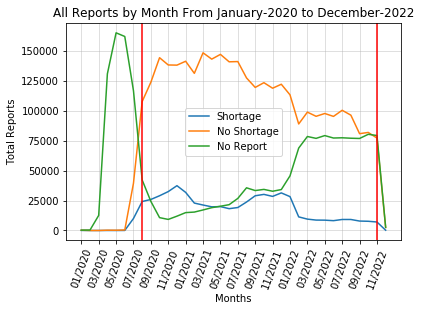

In [27]:
# plot ALL REPORTS for critical staffing shortage BY EACH MONTH from the dataset and save to png
plt.plot(sum_by_month['critical_staffing_shortage_today_yes'])
plt.plot(sum_by_month['critical_staffing_shortage_today_no'])
plt.plot(sum_by_month['critical_staffing_shortage_today_not_reported'])
plt.axvline(x=7, color='red')
plt.axvline(x=34, color='red')

plt.legend(['Shortage', 'No Shortage', 'No Report'])
plt.ylabel('Total Reports')
plt.xlabel('Months')
plt.title('All Reports by Month From {} to {}'.format(datetime.strptime(df['date'].min(), '%Y/%m/%d').strftime('%B-%Y'),
                                               datetime.strptime(df['date'].max(), '%Y/%m/%d').strftime('%B-%Y')
                                              ))
labels = []
for x in np.arange(0,36,2):
    labels.append('{}/{}'.format(sum_by_month['month'][x], sum_by_month['year'][x]))
labels.append('01/2023')
plt.xticks(ticks=np.arange(0,36, 2), labels=labels, rotation=70)
plt.grid(alpha=.5)

plt.savefig('output/1-1.png', bbox_inches='tight')
plt.show()

### The graph above indicates a lack of reports before August 2020 and after November 2022 (last month).

In [28]:
# drop the rows with insufficient data

sum_by_month = sum_by_month.drop([0,1,2,3,4,5,6,35]).reset_index(drop=True)

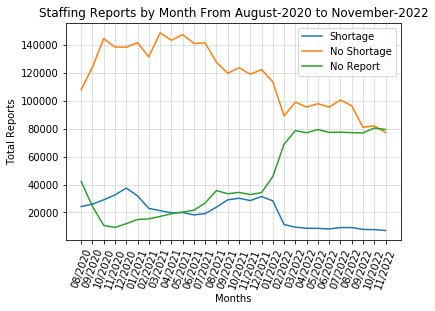

In [29]:
plt.plot(sum_by_month['critical_staffing_shortage_today_yes'])
plt.plot(sum_by_month['critical_staffing_shortage_today_no'])
plt.plot(sum_by_month['critical_staffing_shortage_today_not_reported'])
plt.legend(['Shortage', 'No Shortage', 'No Report'])
plt.ylabel('Total Reports')
plt.xlabel('Months')
plt.title('Staffing Reports by Month From {} to {}'.format(datetime.strptime(f"{sum_by_month['year'][0]} {sum_by_month['month'][0]}", '%Y %m').strftime('%B-%Y'),
                                                         datetime.strptime(f"{sum_by_month['year'][sum_by_month.index.max()]} {sum_by_month['month'][sum_by_month.index.max()]}", '%Y %m').strftime('%B-%Y')))
labels = []
for x in np.arange(0,28,1):
    labels.append('{}/{}'.format(sum_by_month['month'][x], sum_by_month['year'][x]))
plt.xticks(ticks=np.arange(0,28, 1), labels=labels, rotation=70)
plt.grid(alpha=.5)
plt.savefig('output/1-2.png', bbox_inches='tight')
plt.show()

## The reduced timespan appears more useful.

In [30]:
# Create dataframe for National Means by Date
mean_by_date = pd.DataFrame(df.groupby(by='date').mean().reset_index())
mean_by_date = mean_by_date.drop(np.arange(0, 213, 1)).reset_index(drop=True)
mean_by_date = mean_by_date.drop(mean_by_date.index.max()).reset_index()
mean_by_date

,index,date,critical_staffing_shortage_today_yes,critical_staffing_shortage_today_no,critical_staffing_shortage_today_not_reported,hospital_onset_covid,hospital_onset_covid_coverage,inpatient_beds,inpatient_beds_used,inpatient_beds_used_covid,...,adult_icu_bed_covid_utilization,adult_icu_bed_utilization,geocoded_state,deaths_covid,icu_patients_confirmed_influenza,total_patients_hospitalized_confirmed_influenza,total_patients_hospitalized_confirmed_influenza_and_covid,all_pediatric_inpatient_bed_occupied,staffed_icu_pediatric_patients_confirmed_covid,total_staffed_pediatric_icu_beds
0,0,2020/08/01,14.452830,59.547170,30.226415,28.830189,87.811321,13102.698113,8900.283019,1308.207547,...,0.170790,0.656779,NaN,24.792453,0.000000,0.000000,0.000000,487.769231,2.692308,245.884615
1,1,2020/08/02,14.018868,58.169811,31.528302,29.660377,86.509434,12917.811321,8567.830189,1295.867925,...,0.170307,0.648468,NaN,25.075472,0.000000,0.000000,0.000000,467.730769,2.500000,248.788462
2,2,2020/08/03,14.716981,59.396226,30.396226,19.226415,90.849057,13061.150943,8683.886792,1204.283019,...,0.167892,0.632093,NaN,24.301887,0.500000,0.500000,3.500000,431.500000,1.846154,245.750000
3,3,2020/08/04,14.679245,60.075472,29.981132,16.415094,91.169811,13294.075472,9264.528302,1205.773585,...,0.168942,0.662102,NaN,23.207547,0.000000,0.000000,0.000000,448.923077,2.076923,233.923077
4,4,2020/08/05,15.132075,60.584906,29.433962,31.358491,87.396226,13501.490566,9509.528302,1190.150943,...,0.169072,0.669785,NaN,25.075472,0.000000,0.000000,0.000000,469.134615,1.961538,244.352941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,847,2022/11/26,4.407407,47.740741,48.259259,32.629630,97.703704,12884.629630,9407.240741,575.055556,...,0.046709,0.684937,NaN,2.500000,27.407407,211.481481,4.980392,527.851852,2.925926,171.537037
848,848,2022/11/27,4.407407,47.592593,48.074074,32.203704,97.333333,12890.685185,9565.592593,601.222222,...,0.049456,0.697329,NaN,2.346154,30.851852,236.481481,4.882353,531.166667,3.166667,171.574074
849,849,2022/11/28,4.574074,45.222222,48.777778,27.370370,95.851852,12832.944444,9772.722222,634.500000,...,0.051654,0.722167,NaN,2.500000,35.185185,267.222222,5.596154,537.722222,3.148148,171.685185
850,850,2022/11/29,4.611111,44.981481,49.296296,28.611111,96.500000,13021.944444,10332.870370,660.759259,...,0.051619,0.759682,NaN,2.826923,39.296296,289.740741,6.235294,569.111111,3.259259,173.018519


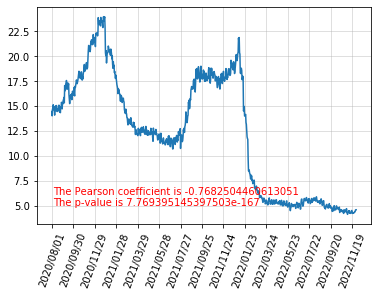

In [31]:
# Display reduced data for shortages across the timespan
plt.plot(mean_by_date['date'], mean_by_date['critical_staffing_shortage_today_yes'])
plt.xticks(ticks=np.arange(0, 883, 60), rotation=70)
plt.grid(alpha=.5)
plt.annotate(f"""The Pearson coefficient is {st.pearsonr(mean_by_date['index'], mean_by_date['critical_staffing_shortage_today_yes'])[0]}
The p-value is {st.pearsonr(mean_by_date['index'], mean_by_date['critical_staffing_shortage_today_yes'])[1]}""", (5,5), color='red')
plt.savefig('output/1-3', bbox_inches='tight')
plt.show()

## Do National Staffing Shortages Reports show any difference between Seasons?

In [32]:
# create a column for 'season'
seasons = []
for x in mean_by_date['date']:
    month = x.split('/')[1]
    if month == '01' or month == '02' or month == '12':
        seasons.append('Winter')
    elif month == '03' or month == '04' or month == '05':
        seasons.append('Spring')
    elif month == '06' or month == '07' or month == '08':
        seasons.append('Summer')
    else:
        seasons.append('Fall')
mean_by_date.insert(1, 'season', seasons)
mean_by_date

,index,season,date,critical_staffing_shortage_today_yes,critical_staffing_shortage_today_no,critical_staffing_shortage_today_not_reported,hospital_onset_covid,hospital_onset_covid_coverage,inpatient_beds,inpatient_beds_used,...,adult_icu_bed_covid_utilization,adult_icu_bed_utilization,geocoded_state,deaths_covid,icu_patients_confirmed_influenza,total_patients_hospitalized_confirmed_influenza,total_patients_hospitalized_confirmed_influenza_and_covid,all_pediatric_inpatient_bed_occupied,staffed_icu_pediatric_patients_confirmed_covid,total_staffed_pediatric_icu_beds
0,0,Summer,2020/08/01,14.452830,59.547170,30.226415,28.830189,87.811321,13102.698113,8900.283019,...,0.170790,0.656779,NaN,24.792453,0.000000,0.000000,0.000000,487.769231,2.692308,245.884615
1,1,Summer,2020/08/02,14.018868,58.169811,31.528302,29.660377,86.509434,12917.811321,8567.830189,...,0.170307,0.648468,NaN,25.075472,0.000000,0.000000,0.000000,467.730769,2.500000,248.788462
2,2,Summer,2020/08/03,14.716981,59.396226,30.396226,19.226415,90.849057,13061.150943,8683.886792,...,0.167892,0.632093,NaN,24.301887,0.500000,0.500000,3.500000,431.500000,1.846154,245.750000
3,3,Summer,2020/08/04,14.679245,60.075472,29.981132,16.415094,91.169811,13294.075472,9264.528302,...,0.168942,0.662102,NaN,23.207547,0.000000,0.000000,0.000000,448.923077,2.076923,233.923077
4,4,Summer,2020/08/05,15.132075,60.584906,29.433962,31.358491,87.396226,13501.490566,9509.528302,...,0.169072,0.669785,NaN,25.075472,0.000000,0.000000,0.000000,469.134615,1.961538,244.352941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,847,Fall,2022/11/26,4.407407,47.740741,48.259259,32.629630,97.703704,12884.629630,9407.240741,...,0.046709,0.684937,NaN,2.500000,27.407407,211.481481,4.980392,527.851852,2.925926,171.537037
848,848,Fall,2022/11/27,4.407407,47.592593,48.074074,32.203704,97.333333,12890.685185,9565.592593,...,0.049456,0.697329,NaN,2.346154,30.851852,236.481481,4.882353,531.166667,3.166667,171.574074
849,849,Fall,2022/11/28,4.574074,45.222222,48.777778,27.370370,95.851852,12832.944444,9772.722222,...,0.051654,0.722167,NaN,2.500000,35.185185,267.222222,5.596154,537.722222,3.148148,171.685185
850,850,Fall,2022/11/29,4.611111,44.981481,49.296296,28.611111,96.500000,13021.944444,10332.870370,...,0.051619,0.759682,NaN,2.826923,39.296296,289.740741,6.235294,569.111111,3.259259,173.018519


In [33]:
# Define a function to create Linear Regression plots
def linear_regression(x,y):
    result = linregress(x, y)
    print(f'The Coefficient of Determination (r squared) is {result.rvalue ** 2}')
    return plt.plot(x, result.intercept + result.slope*x, 'r', label='Linear Regression')
def linreg_annotation(x,y):
    result = linregress(x, y)
    return f'''y = {round(result.slope, 2)}x + {round(result.intercept, 2)}
    
R = {result.rvalue ** 2}'''

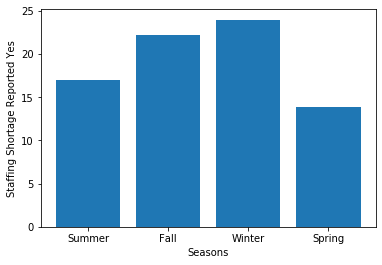

In [34]:
plt.bar(mean_by_date['season'], mean_by_date['critical_staffing_shortage_today_yes'])
plt.xlabel('Seasons')
plt.ylabel('Staffing Shortage Reported Yes')
plt.savefig('output/1-4', bbox_inches='tight')
plt.show()

In [35]:
season_means = pd.DataFrame(mean_by_date.groupby(by='season').mean()).drop(columns='index')
season_means = season_means.reindex(['Spring','Summer','Fall','Winter']).reset_index()
season_means = season_means.reset_index()
season_means

,index,season,critical_staffing_shortage_today_yes,critical_staffing_shortage_today_no,critical_staffing_shortage_today_not_reported,hospital_onset_covid,hospital_onset_covid_coverage,inpatient_beds,inpatient_beds_used,inpatient_beds_used_covid,...,adult_icu_bed_covid_utilization,adult_icu_bed_utilization,geocoded_state,deaths_covid,icu_patients_confirmed_influenza,total_patients_hospitalized_confirmed_influenza,total_patients_hospitalized_confirmed_influenza_and_covid,all_pediatric_inpatient_bed_occupied,staffed_icu_pediatric_patients_confirmed_covid,total_staffed_pediatric_icu_beds
0,0,Spring,8.963971,74.418309,29.437753,18.267377,110.065223,14378.258973,10494.352773,568.770260,...,0.069877,0.679499,NaN,5.541682,2.811889,24.657821,2.006093,578.337939,2.311997,259.737997
1,1,Summer,9.782084,70.532860,31.043367,22.177477,107.078587,14174.257514,10457.973478,804.648691,...,0.096564,0.686461,NaN,8.145269,1.732036,14.004080,1.349519,586.477271,3.719717,270.356295
2,2,Fall,13.540115,68.957983,25.943967,22.750390,104.712312,14080.390774,10399.230311,938.417178,...,0.143492,0.718306,NaN,11.951176,3.344544,24.205686,4.491103,611.961350,2.131307,289.330857
3,3,Winter,16.985938,76.490486,19.741940,40.950070,110.475615,14575.558883,10886.401081,1928.837507,...,0.233296,0.741932,NaN,26.208931,2.249903,18.504498,7.297809,563.668339,3.058434,304.481658


In [38]:
chi_square_test_statistic, p_value = st.chisquare(season_means['critical_staffing_shortage_today_yes'])
print('chi_square_test_statistic is : ' + str(chi_square_test_statistic))
print('p_value : ' + str(p_value))
print(st.chi2.ppf(1-0.05, df=1))

chi_square_test_statistic is : 3.3254992232445324
p_value : 0.3441093669514483
3.841458820694124


The Coefficient of Determination (r squared) is 0.9449503575750055


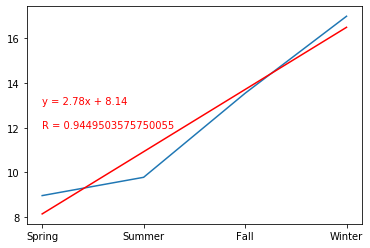

In [39]:
plt.plot(season_means['index'], season_means['critical_staffing_shortage_today_yes'])
linear_regression(season_means['index'], season_means['critical_staffing_shortage_today_yes'])
plt.annotate(linreg_annotation(season_means['index'], season_means['critical_staffing_shortage_today_yes']), (0,12), color='red')
plt.xticks([0,1,2,3], labels=list(season_means['season']))
plt.savefig('output/1-5', bbox_inches='tight')
plt.show()

In [20]:
# group dataframe by day of the year
doy_means = mean_by_date.groupby(by='Day of Year').mean().drop(columns='index').reset_index()
doy_means = doy_means.reset_index()
doy_means

,index,Day of Year,critical_staffing_shortage_today_yes,critical_staffing_shortage_today_no,critical_staffing_shortage_today_not_reported,hospital_onset_covid,hospital_onset_covid_coverage,inpatient_beds,inpatient_beds_used,inpatient_beds_used_covid,...,adult_icu_bed_covid_utilization,adult_icu_bed_utilization,geocoded_state,deaths_covid,icu_patients_confirmed_influenza,total_patients_hospitalized_confirmed_influenza,total_patients_hospitalized_confirmed_influenza_and_covid,all_pediatric_inpatient_bed_occupied,staffed_icu_pediatric_patients_confirmed_covid,total_staffed_pediatric_icu_beds
0,0,001,19.438155,81.680294,14.891684,44.991789,113.278302,14742.817435,10603.160901,2192.287037,...,0.259504,0.732926,NaN,31.291055,2.893781,25.684137,9.158980,642.922963,0.041667,392.070741
1,1,002,19.860412,81.776380,14.373340,44.155660,113.250175,14717.686583,10538.899720,2262.217331,...,0.262936,0.728161,NaN,29.709469,2.957722,25.732879,9.128057,616.219630,0.000000,387.257407
2,2,003,20.280748,76.875262,13.455276,42.680818,107.860762,14229.913522,10353.367226,2347.761006,...,0.267926,0.738095,NaN,32.268344,2.983927,26.569008,9.859888,568.176296,0.000000,388.832222
3,3,004,20.373340,72.120370,13.335080,42.735150,103.078267,13848.796820,10345.617925,2426.832285,...,0.270990,0.749930,NaN,32.853599,3.323375,25.057652,9.265549,541.169259,0.000000,386.970741
4,4,005,21.124389,76.970300,13.150070,47.645178,108.512404,14423.014500,11018.918064,2509.943222,...,0.273118,0.763036,NaN,36.006464,2.985325,23.051363,10.171558,632.948148,0.000000,396.845556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,361,362,21.619846,75.375087,13.539832,35.590671,107.774808,14219.105695,10139.369147,2018.394654,...,0.258498,0.730886,NaN,29.159853,2.567610,25.674878,9.237771,572.832593,0.200000,384.632963
362,362,363,21.470825,76.429944,13.241614,36.922082,108.419637,14304.177149,10465.553459,2089.852900,...,0.262953,0.739578,NaN,32.545423,2.725367,26.181866,10.113382,609.825556,0.200000,388.671852
363,363,364,20.262579,76.832110,14.075821,39.709119,108.438679,14377.131377,10758.477987,2148.678546,...,0.262361,0.749102,NaN,32.019916,2.808001,26.284591,9.694794,617.518148,0.800000,385.306667
364,364,365,19.870894,82.781272,13.320231,43.634871,113.297170,14828.794899,11076.831936,2199.395003,...,0.261229,0.746535,NaN,32.351502,2.705451,28.505765,9.498253,661.159630,0.200000,388.215185


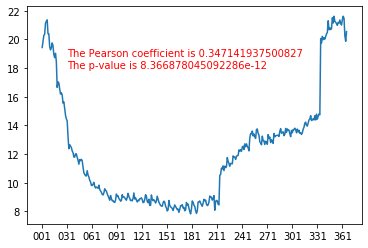

The Pearson coefficient is 0.347141937500827
The p-value is 8.366878045092286e-12


In [19]:
plt.plot(doy_means['Day of Year'], doy_means['critical_staffing_shortage_today_yes'])
plt.xticks(np.arange(0, 367, 30))
plt.annotate(f"""The Pearson coefficient is {st.pearsonr(doy_means['index'] +1, doy_means['critical_staffing_shortage_today_yes'])[0]}
The p-value is {st.pearsonr(doy_means['index'] +1, doy_means['critical_staffing_shortage_today_yes'])[1]}""", (30,18), color='red')
plt.savefig('output/1-6', bbox_inches='tight')
plt.show()
print(f"""The Pearson coefficient is {st.pearsonr(doy_means['index'] +1, doy_means['critical_staffing_shortage_today_yes'])[0]}
The p-value is {st.pearsonr(doy_means['index'] +1, doy_means['critical_staffing_shortage_today_yes'])[1]}""")

## Do National Staffing Shortages show any difference between Days of the Week?

In [40]:
# create column for 'day of the week'
dow = []
for x in mean_by_date['date']:
    weekday = datetime.strptime(x, '%Y/%m/%d').strftime('%A')
    dow.append(weekday)
mean_by_date.insert(1, 'Day of Week', dow)

In [41]:
dow_means = mean_by_date.groupby(by='Day of Week').mean().drop(columns='index')
dow_means = dow_means.reindex(['Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday']).reset_index()
dow_means = dow_means.reset_index()
dow_means

,index,Day of Week,critical_staffing_shortage_today_yes,critical_staffing_shortage_today_no,critical_staffing_shortage_today_not_reported,hospital_onset_covid,hospital_onset_covid_coverage,inpatient_beds,inpatient_beds_used,inpatient_beds_used_covid,...,adult_icu_bed_covid_utilization,adult_icu_bed_utilization,geocoded_state,deaths_covid,icu_patients_confirmed_influenza,total_patients_hospitalized_confirmed_influenza,total_patients_hospitalized_confirmed_influenza_and_covid,all_pediatric_inpatient_bed_occupied,staffed_icu_pediatric_patients_confirmed_covid,total_staffed_pediatric_icu_beds
0,0,Wednesday,12.530722,74.986219,25.919221,27.226117,110.075045,14568.510763,11006.964845,1047.991838,...,0.134948,0.721336,NaN,12.965677,2.783647,22.022196,3.868782,626.905834,2.766398,281.930038
1,1,Thursday,12.518276,74.027534,27.121446,25.933180,110.226126,14572.857333,10991.249568,1043.081775,...,0.134744,0.719708,NaN,12.925021,2.480941,20.009864,3.709937,626.374398,2.713769,281.285752
2,2,Friday,12.554167,73.951525,27.214928,26.298130,110.322323,14551.290328,10890.026841,1031.696317,...,0.133774,0.715004,NaN,12.771582,2.489043,20.155401,3.627058,623.850765,2.759747,281.877678
3,3,Saturday,12.226444,74.328152,27.016098,25.951289,110.065393,14470.408593,10534.813812,1017.055135,...,0.133244,0.700928,NaN,12.414413,2.485231,19.887711,3.676004,615.654128,2.780816,283.833982
4,4,Sunday,12.198402,74.306357,26.995976,25.808726,109.948769,14402.062833,10309.953145,1021.484870,...,0.134216,0.686421,NaN,11.979586,2.520637,20.248462,3.630075,595.185035,2.753599,283.668030
5,5,Monday,12.180302,66.756475,26.114720,23.523181,101.593724,13633.614711,9817.582088,1033.192443,...,0.136082,0.690844,NaN,12.602501,2.637343,20.336424,3.884149,503.646348,2.704603,278.434082
6,6,Tuesday,12.115553,66.556277,26.350881,23.648354,101.592535,13717.127934,10218.660143,1044.076437,...,0.136055,0.714093,NaN,12.676282,2.740768,21.004233,3.884990,525.455368,2.727709,278.442410


The Coefficient of Determination (r squared) is 0.8327570900365789


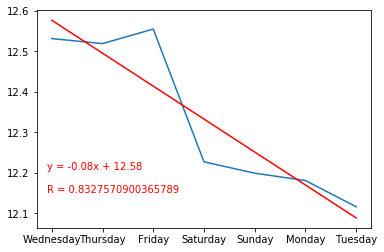

In [42]:
plt.plot(dow_means['index'], dow_means['critical_staffing_shortage_today_yes'])
linear_regression(dow_means['index'], dow_means['critical_staffing_shortage_today_yes'])
plt.annotate(linreg_annotation(dow_means['index'], dow_means['critical_staffing_shortage_today_yes']), (-.1,12.15), color='red')
plt.xticks([0,1,2,3,4,5,6], labels=list(dow_means['Day of Week']))
plt.savefig('output/1-7', bbox_inches='tight')
plt.show()

# Hypotheses for section 2

## 2.1) Staff Shortages and Covid Deaths

Null 2-1: There are no correlations and or relationship between critical staff shortages being reported and Covid Deaths from 2020 to 2022?

Alternative: 2-1: There are correlations and or relationship between critical staff shortages being reported and Covid Deaths from 2020 to 2022?



# Hypotheses for section 3

### 3.1) Staffing Shortages from 2020 to 2022 vs. Inpatient Occupancy (Adult and Pediatric) at Hostpitals across the US

Null 3.1: There is no relationship between staff shortages and inpatient occupancy from 2020 to 2022

Alternative 3.1: There is a relationship between critical staff shortages and adult and/or pediatric inpatient occupancy from 2020 to 2022
    
### 3.2) Staffing Shortages from 2020 to 2022 vs. Confirmed Covid Cases (Adult and Pediatric) at Hostpitals across the US    
    
Null 3.2: There is no relationship between staff shortages and confirmed covid cases from 2020 to 2022

Alternative 3.2: There is a relationship between critical staff shortages and confirmed covid cases in adult and/or pediatrics from 2020 to 2022    
    

### Hypothesis 3.1 DATA ANALYSIS
Bring in data and select columns of interest 

In [2]:
# display dataset as a Pandas DataFrame
data_H3 = pd.read_csv('Resources/COVID_staff_shortages.csv')

#add columns for year, month, data for additional grouping/analysis 
data_H3['date_for_split'] = data_H3['date']
data_H3[['year', 'month','day']] = data_H3['date_for_split'].str.split('/', 2, expand=True)
data_H3

#make df with select data of interest
select_df = data_H3[['state','date','year','month','day',
                'critical_staffing_shortage_today_yes','critical_staffing_shortage_today_no','critical_staffing_shortage_today_not_reported',
                'inpatient_beds','inpatient_beds_used',
                'previous_day_admission_adult_covid_confirmed',
                'previous_day_admission_pediatric_covid_confirmed',
                'all_pediatric_inpatient_bed_occupied','all_pediatric_inpatient_beds',
                'previous_day_deaths_covid_and_influenza_coverage',]]
select_df

,state,date,year,month,day,critical_staffing_shortage_today_yes,critical_staffing_shortage_today_no,critical_staffing_shortage_today_not_reported,inpatient_beds,inpatient_beds_used,previous_day_admission_adult_covid_confirmed,previous_day_admission_pediatric_covid_confirmed,all_pediatric_inpatient_bed_occupied,all_pediatric_inpatient_beds,previous_day_deaths_covid_and_influenza_coverage
0,ME,2021/01/23,2021,01,23,1,30,8,3229.0,2231.0,15.0,0.0,174.0,226.0,38
1,SD,2021/01/23,2021,01,23,2,60,3,2868.0,1641.0,8.0,1.0,291.0,387.0,62
2,MD,2021/01/22,2021,01,22,2,57,1,11827.0,9635.0,217.0,0.0,648.0,902.0,59
3,RI,2021/01/22,2021,01,22,6,8,1,2402.0,2445.0,25.0,0.0,635.0,573.0,14
4,ID,2021/01/21,2021,01,21,4,40,8,3694.0,2268.0,32.0,2.0,273.0,704.0,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54006,MT,2021/03/29,2021,03,29,6,58,1,2938.0,1762.0,8.0,0.0,45.0,86.0,64
54007,NJ,2021/03/09,2021,03,09,9,61,8,21569.0,15395.0,241.0,4.0,365.0,369.0,77
54008,NM,2021/05/19,2021,05,19,12,43,1,4446.0,3181.0,21.0,0.0,36.0,52.0,55
54009,NE,2021/04/15,2021,04,15,9,91,1,4368.0,2958.0,22.0,0.0,14.0,22.0,100


In [23]:
#group by year and month
month_year_group = select_df.groupby(["year", "month"])
month_year_group_df = month_year_group.sum()

#create new column with sum of reported yes, no, and not reported
month_year_group_df['total_staffing'] = month_year_group_df.iloc[:, 0:3].sum(axis=1)
#percent shortage yes today
month_year_group_df['percent_shortage_today'] = ((month_year_group_df['critical_staffing_shortage_today_yes'] / month_year_group_df['total_staffing'])*100).round(2)
month_year_group_df['percent_inpatient_occupancy'] = ((month_year_group_df['inpatient_beds_used'] / month_year_group_df['inpatient_beds'])*100).round(2)
month_year_group_df['percent_pediatric_occupancy'] = ((month_year_group_df['all_pediatric_inpatient_bed_occupied'] / month_year_group_df['all_pediatric_inpatient_beds'])*100).round(2)

month_year_group_df

critical_staffing_shortage_today_yes  \
year month                                         
2020 01                                       80   
     02                                        0   
     03                                        0   
     04                                       30   
     05                                        6   
     06                                       48   
     07                                    10034   
     08                                    24221   
     09                                    25951   
     10                                    29044   
     11                                    32528   
     12                                    37456   
2021 01                                    31865   
     02                                    22916   
     03                                    21294   
     04                                    19784   
     05                                    19979   
     06                                    18246   
     07                                    19202   
     08                                    23797   
     09                                    29035   
     10                                    30184   
     11                                    28507   
     12                                    31424   
2022 01                                    28320   
     02                                    11382   
     03                                     9509   
     04                                     8706   
     05                                     8642   
     06                                     8218   
     07                                     9203   
     08                                     9206   
     09                                     7896   
     10                                     7708   
     11                                     7104   
     12                                      249   

            critical_staffing_shortage_today_no  \
year month                                        
2020 01                                     220   
     02                                       0   
     03                                       6   
     04                                     257   
     05                                     235   
     06                                     442   
     07                                   39506   
     08                                  107763   
     09                                  123922   
     10                                  144423   
     11                                  138355   
     12                                  138220   
2021 01                                  141469   
     02                                  131354   
     03                                  148516   
     04                                  143240   
     05                                  147207   
     06                                  140994   
     07                                  141201   
     08                                  127523   
     09                                  119585   
     10                                  123554   
     11                                  118919   
     12                                  122245   
2022 01                                  113384   
     02                                   89060   
     03                                   98934   
     04                                   95445   
     05                                   97796   
     06                                   95370   
     07                                  100482   
     08                                   96393   
     09                                   80925   
     10                                   81964   
     11                                   77258   
     12                                    2480   

            critical_staffing_shortage_today_not_reported  inpatient_beds  \
year month         

### Hypothesis 3.1 (Cont.)
Group data to plot and compare the flux of the percentage changes in staff shortages and percent inpatient occupancy (adult and pediatric) from Jan 2020 (month 1) to Dec 2022 (month 36)

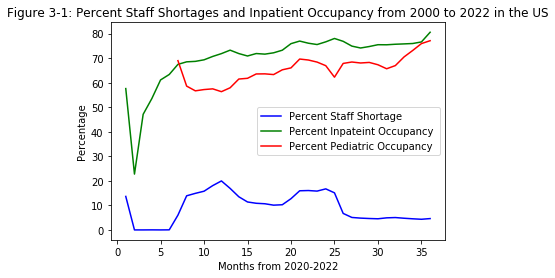

In [24]:

#line chart
#plot percent shortage as a line chart
months = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36]

#items to plot 
shortage_percent_today = month_year_group_df["percent_shortage_today"]
inpatient_occupancy = month_year_group_df['percent_inpatient_occupancy']
pediatric_occupancy = month_year_group_df['percent_pediatric_occupancy']


percent_shortage_today = plt.plot(months,shortage_percent_today, color="blue", label="Percent Staff Shortage")
inpatient_occupancy_today = plt.plot(months,inpatient_occupancy, color="green", label="Percent Inpateint Occupancy ")
pediatric_occupancy_today = plt.plot(months,pediatric_occupancy, color="red", label="Percent Pediatric Occupancy")

# Create a legend for our chart
plt.legend(handles=[percent_shortage_today[0], inpatient_occupancy_today[0], pediatric_occupancy_today[0]], loc="best")
plt.xlabel("Months from 2020-2022")
plt.ylabel("Percentage")
plt.title("Figure 3-1: Percent Staff Shortages and Inpatient Occupancy from 2000 to 2022 in the US",loc='center')
#save then show the chart
plt.savefig("output/3-1.png")
plt.show()


In [25]:
#confirm the amount of time points taken each year are not identical across all years
select_df['year'].value_counts()

2021    19475
2022    18090
2020    16446
Name: year, dtype: int64

### Hypothesis 3.1 (Cont.)
Breakout data by year to compare the flux of the percentage changes in staff shortages and percent inpatient occupancy (adult and pediatric) Jan - Dec in each of the three calendar years

In [26]:
#dataframe for only 2020
select_2020 = select_df.loc[select_df['year'] == '2020', :]
#dataframe for only 2021
select_2021 = select_df.loc[select_df['year'] == '2021',:]
#dataframe for 2022
select_2022 =  select_df.loc[select_df['year'] == '2022',:]

#group by date 2020 
date_2020_group = select_2020.groupby(["date"])
date_2020_group_df = date_2020_group.sum()
#create new column with sum of reported yes, no, and not reported
date_2020_group_df['total_staffing'] = date_2020_group_df.iloc[:, 0:3].sum(axis=1)
#percent shortage yes today
date_2020_group_df['percent_shortage_today'] = ((date_2020_group_df['critical_staffing_shortage_today_yes'] / date_2020_group_df['total_staffing'])*100).round(2)
#percent shortage inpatient today
date_2020_group_df['percent_inpatient_occupancy'] = ((date_2020_group_df['inpatient_beds_used'] / date_2020_group_df['inpatient_beds'])*100).round(2)
#percent shortage pediatric patient today
date_2020_group_df['percent_pediatric_occupancy'] = ((date_2020_group_df['all_pediatric_inpatient_bed_occupied'] / date_2020_group_df['all_pediatric_inpatient_beds'])*100).round(2)


#group by date 2021
date_2021_group = select_2021.groupby(["date"])
date_2021_group_df = date_2021_group.sum()
#create new column with sum of reported yes, no, and not reported
date_2021_group_df['total_staffing'] = date_2021_group_df.iloc[:, 0:3].sum(axis=1)
#percent shortage yes today
date_2021_group_df['percent_shortage_today'] = ((date_2021_group_df['critical_staffing_shortage_today_yes'] / date_2021_group_df['total_staffing'])*100).round(2)
#percent shortage inpatient today
date_2021_group_df['percent_inpatient_occupancy'] = ((date_2021_group_df['inpatient_beds_used'] / date_2021_group_df['inpatient_beds'])*100).round(2)
#percent shortage pediatric patient today
date_2021_group_df['percent_pediatric_occupancy'] = ((date_2021_group_df['all_pediatric_inpatient_bed_occupied'] / date_2021_group_df['all_pediatric_inpatient_beds'])*100).round(2)


#group by date 2022
date_2022_group = select_2022.groupby(["date"])
date_2022_group_df = date_2022_group.sum()
#create new column with sum of reported yes, no, and not reported
date_2022_group_df['total_staffing'] = date_2022_group_df.iloc[:, 0:3].sum(axis=1)
#percent shortage yes today
date_2022_group_df['percent_shortage_today'] = ((date_2022_group_df['critical_staffing_shortage_today_yes'] / date_2022_group_df['total_staffing'])*100).round(2)
#percent shortage inpatient today
date_2022_group_df['percent_inpatient_occupancy'] = ((date_2022_group_df['inpatient_beds_used'] / date_2022_group_df['inpatient_beds'])*100).round(2)
#percent shortage pediatric patient today
date_2022_group_df['percent_pediatric_occupancy'] = ((date_2022_group_df['all_pediatric_inpatient_bed_occupied'] / date_2022_group_df['all_pediatric_inpatient_beds'])*100).round(2)


### Hypothesis 3.1 (Cont.)
Create a scatterplot to compare the percent staff shortages and adult occupancy in 2020 along with a regression line - Do they both increase at the same time? Decrease? no relationship?

The r-value is: 0.4261575948262478


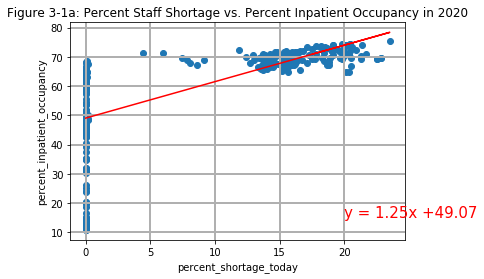

In [27]:
#create scatter plot shortage vs percent inpatient 2020
x_values = date_2020_group_df['percent_shortage_today']
y_values = date_2020_group_df['percent_inpatient_occupancy']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.title("Figure 3-1a: Percent Staff Shortage vs. Percent Inpatient Occupancy in 2020")
plt.xlabel('percent_shortage_today')
plt.ylabel('percent_inpatient_occupancy')
# add dot size and color outline 
plt.grid(linestyle='-', linewidth=2)

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))


plt.plot(x_values,regress_values,"r-")
# Label plot and annotate the line equation

plt.annotate(line_eq,(20,15),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.savefig("output/3-1a.png")
plt.show()

### Hypothesis 3.1 (Cont.)
Create a scatterplot to compare the percent staff shortages at >= 5% and adult occupancy in 2020 along with a regression line - Do they both increase at the same time? Decrease? no relationship?

The r-value is: 0.15799358920737816


/Users/nicolettealbright/opt/anaconda3/envs/pythondata/lib/python3.7/site-packages/ipykernel_launcher.py:29: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 


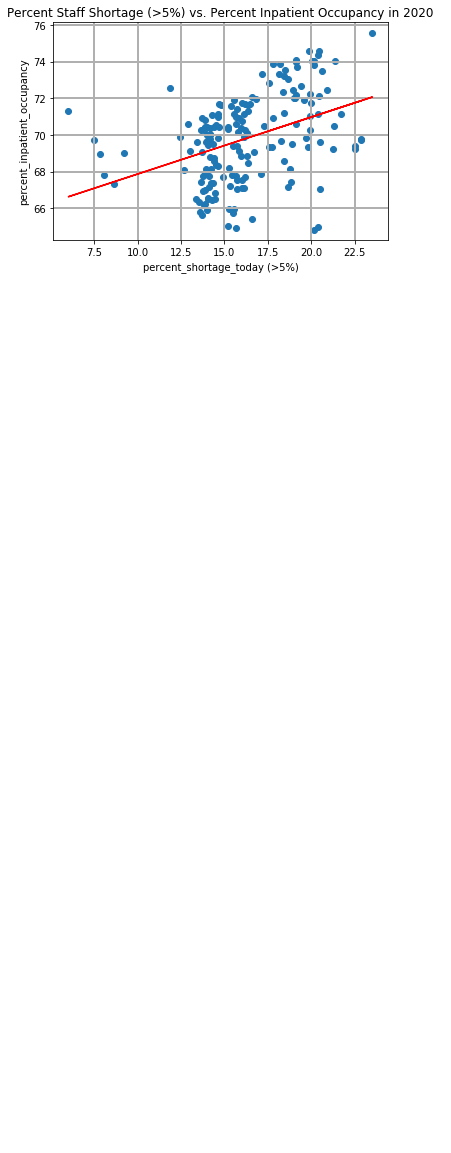

In [28]:
# Create a DataFrame with the percent shortage >= 5%)
date_2020_group_df_g5 = date_2020_group_df.loc[date_2020_group_df['percent_shortage_today'] >=5 , :]

# Display scatter plot with similar data filtered 
x_values_g5 = date_2020_group_df_g5['percent_shortage_today']
y_values_g5 = date_2020_group_df_g5['percent_inpatient_occupancy']
plt.scatter(x_values_g5,y_values_g5)

# Incorporate the other graph properties
plt.title("Percent Staff Shortage (>5%) vs. Percent Inpatient Occupancy in 2020")
plt.xlabel('percent_shortage_today (>5%)')
plt.ylabel('percent_inpatient_occupancy')
# add dot size and color outline 
plt.grid(linestyle='-', linewidth=2)

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_g5, y_values_g5)
regress_values = x_values_g5 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))


plt.plot(x_values_g5,regress_values,"r-")
# Label plot and annotate the line equation

plt.annotate(line_eq,(20,15),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")

# Show plot
plt.tight_layout()
plt.show()

### Hypothesis 3.1 (Cont.)
Create a scatterplot to compare the percent staff shortages and pediatric occupancy in 2020 along with a regression line - Do they both increase at the same time? Decrease? no relationship?

The r-value is: nan


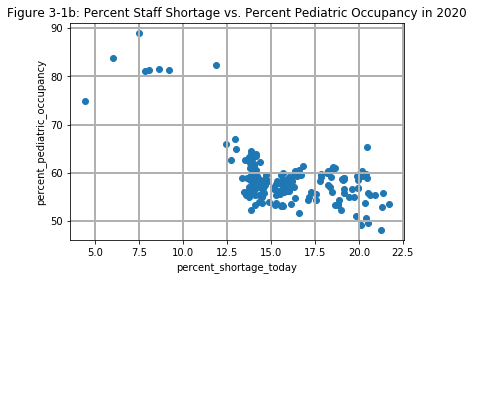

In [29]:
#create scatter plot shortage vs percent prdiatric 2020
x_values_ped_2020 = date_2020_group_df['percent_shortage_today']
y_values_ped_2020 = date_2020_group_df['percent_pediatric_occupancy']
plt.scatter(x_values_ped_2020,y_values_ped_2020)

# Incorporate the other graph properties
plt.title("Figure 3-1b: Percent Staff Shortage vs. Percent Pediatric Occupancy in 2020")
plt.xlabel('percent_shortage_today')
plt.ylabel('percent_pediatric_occupancy')
# add dot size and color outline 
plt.grid(linestyle='-', linewidth=2)

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_ped_2020, y_values_ped_2020)
regress_values = x_values_ped_2020 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))


plt.plot(x_values_ped_2020,regress_values,"r-")
# Label plot and annotate the line equation

plt.annotate(line_eq,(20,15),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")
plt.savefig("output/3-1b.png")
# Show plot
#plt.tight_layout()
plt.show()

### Hypothesis 3.1 (Cont.)
Create a scatterplot to compare the percent staff shortages and adult occupancy in 2021 along with a regression line - Do they both increase at the same time? Decrease? no relationship?

The r-value is: 0.2874537472379055


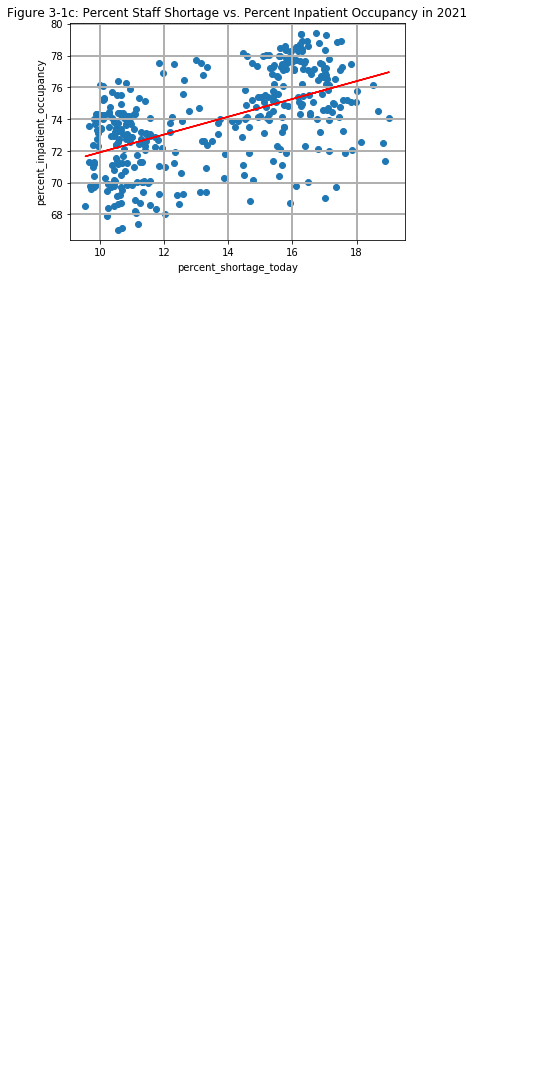

In [10]:
#create scatter plot shortage vs percent inpatient 2021
x_values_2021 = date_2021_group_df['percent_shortage_today']
#note min of percent shortage today is above 5% for 2021 so no need to filter 
y_values_2021 = date_2021_group_df['percent_inpatient_occupancy']
plt.scatter(x_values_2021,y_values_2021)

# Incorporate the other graph properties
plt.title("Figure 3-1c: Percent Staff Shortage vs. Percent Inpatient Occupancy in 2021")
plt.xlabel('percent_shortage_today')
plt.ylabel('percent_inpatient_occupancy')
# add dot size and color outline 
plt.grid(linestyle='-', linewidth=2)

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_2021, y_values_2021)
regress_values = x_values_2021 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))


plt.plot(x_values_2021,regress_values,"r-")
# Label plot and annotate the line equation

plt.annotate(line_eq,(20,15),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")
plt.savefig("output/3-1c.png")
# Show plot
#plt.tight_layout()
plt.show()

### Hypothesis 3.1 (Cont.)
Create a scatterplot to compare the percent staff shortages and pediatric occupancy in 2021 along with a regression line - Do they both increase at the same time? Decrease? no relationship?

The r-value is: 0.024683530553724953


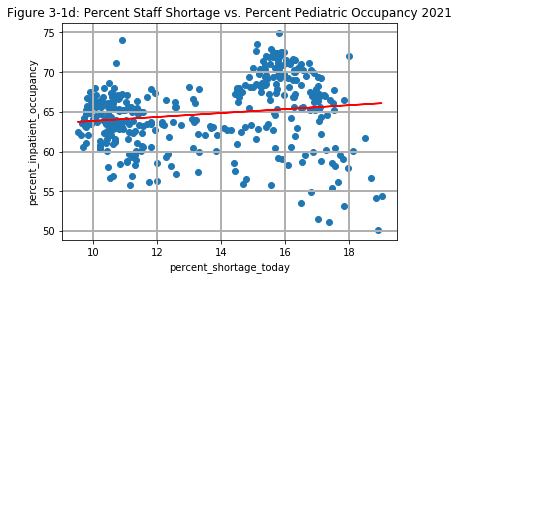

In [30]:
#create scatter plot shortage vs percent Pediatric 2021
x_values_2021 = date_2021_group_df['percent_shortage_today']
#note min of percent shortage today is above 5% for 2021 so no need to filter 
y_values_2021_ped = date_2021_group_df['percent_pediatric_occupancy']
plt.scatter(x_values_2021,y_values_2021_ped)

# Incorporate the other graph properties
plt.title("Figure 3-1d: Percent Staff Shortage vs. Percent Pediatric Occupancy 2021")
plt.xlabel('percent_shortage_today')
plt.ylabel('percent_inpatient_occupancy')
# add dot size and color outline 
plt.grid(linestyle='-', linewidth=2)

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_2021, y_values_2021_ped)
regress_values = x_values_2021 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))


plt.plot(x_values_2021,regress_values,"r-")
# Label plot and annotate the line equation

plt.annotate(line_eq,(20,15),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")
plt.savefig("output/3-1d.png")
# Show plot
#plt.tight_layout()
plt.show()

### Hypothesis 3.1 (Cont.)
Create a scatterplot to compare the percent staff shortages and adult occupancy in 2022 along with a regression line - Do they both increase at the same time? Decrease? no relationship?

The r-value is: 0.14303031654041856


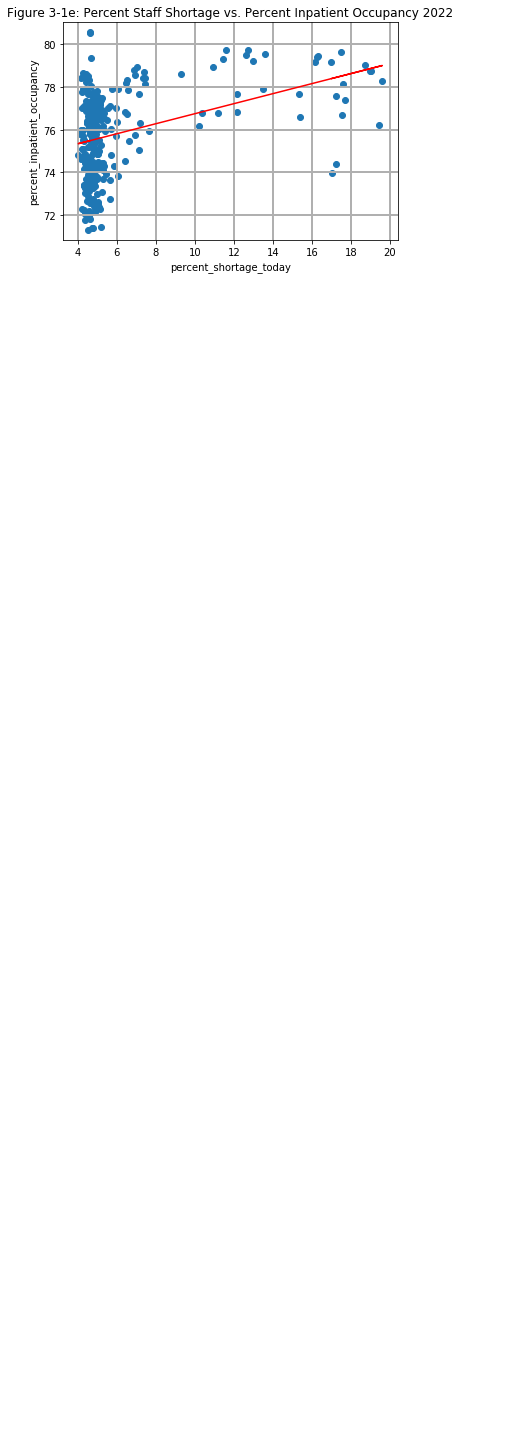

In [31]:
#create scatter plot shortage vs percent inpatient 2022
x_values_2022 = date_2022_group_df['percent_shortage_today']
#first try with mins below 5%
y_values_2022 = date_2022_group_df['percent_inpatient_occupancy']
plt.scatter(x_values_2022,y_values_2022)

# Incorporate the other graph properties
plt.title("Figure 3-1e: Percent Staff Shortage vs. Percent Inpatient Occupancy 2022")
plt.xlabel('percent_shortage_today')
plt.ylabel('percent_inpatient_occupancy')
# add dot size and color outline 
plt.grid(linestyle='-', linewidth=2)

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_2022, y_values_2022)
regress_values = x_values_2022 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))


plt.plot(x_values_2022,regress_values,"r-")
# Label plot and annotate the line equation

plt.annotate(line_eq,(20,15),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")
plt.savefig("output/3-1e.png")
# Show plot
#plt.tight_layout()
plt.show()

### Hypothesis 3.1 (Cont.)
Create a scatterplot to compare the percent staff shortages and prdiatric occupancy in 2022 along with a regression line - Do they both increase at the same time? Decrease? no relationship?

The r-value is: 0.20865800480409274


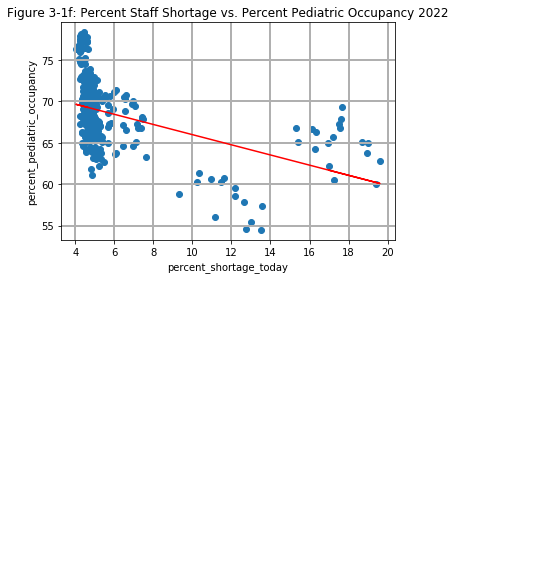

In [32]:
#create scatter plot shortage vs percent inpatient 2022
x_values_2022 = date_2022_group_df['percent_shortage_today']
y_values_2022_ped = date_2022_group_df['percent_pediatric_occupancy']
plt.scatter(x_values_2022,y_values_2022_ped)

# Incorporate the other graph properties
plt.title("Figure 3-1f: Percent Staff Shortage vs. Percent Pediatric Occupancy 2022")
plt.xlabel('percent_shortage_today')
plt.ylabel('percent_pediatric_occupancy')
# add dot size and color outline 
plt.grid(linestyle='-', linewidth=2)

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_2022, y_values_2022_ped)
regress_values = x_values_2022 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))


plt.plot(x_values_2022,regress_values,"r-")
# Label plot and annotate the line equation

plt.annotate(line_eq,(20,15),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")
plt.savefig("output/3-1f.png")
# Show plot
#plt.tight_layout()
plt.show()

### Hypothesis 3.2 DATA ANALYSIS
Group data to plot and compare the flux of the percentage changes in staff shortages and total confirmed covid cases (adult and pediatric) from Jan 2020 (month 1) to Dec 2022 (month 36). 

Note: covid confirmations reported for previous day, this needs to be shifted so comparing across same day.

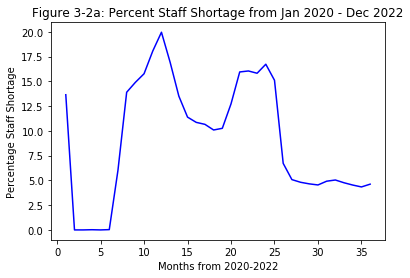

In [33]:
#Shift data from "previous day covid confirm so it is on the correct day"
sorted_df = select_df.sort_values(by='date')
sorted_df[['admission_pediatric_covid_confirmed','previous_day_admission_adult_covid_confirmed']] = sorted_df[['previous_day_admission_pediatric_covid_confirmed','previous_day_admission_adult_covid_confirmed']].shift(-1)
#re-group shifted data for use 
month_year_group_shifted = sorted_df.groupby(["year", "month"])
month_year_group_shifted = month_year_group.sum()
month_year_group_shifted

#create new column with sum of reported yes, no, and not reported
month_year_group_shifted['total_staffing'] = month_year_group_shifted.iloc[:, 0:3].sum(axis=1)
#percent shortage yes today
month_year_group_shifted['percent_shortage_today'] = ((month_year_group_shifted['critical_staffing_shortage_today_yes'] / month_year_group_shifted['total_staffing'])*100).round(2)


#plot percent shortage as a line chart
months = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36]

#items to plot 
shortage_percent_today = month_year_group_shifted["percent_shortage_today"]
percent_shortage_today = plt.plot(months,shortage_percent_today, color="blue", label="Percent Staff Shortage Today")
plt.title("Figure 3-2a: Percent Staff Shortage from Jan 2020 - Dec 2022")
plt.xlabel("Months from 2020-2022")
plt.ylabel("Percentage Staff Shortage")
#show the chart
plt.savefig("output/3-2a.png")
plt.show()

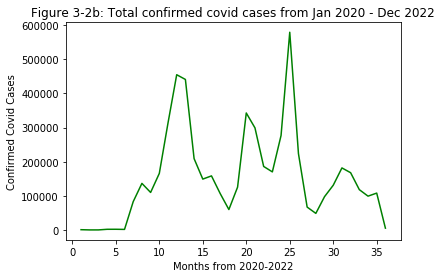

In [34]:
'''ADULT CASES COVID'''
#plot covid admitance thorugh entire time line
months = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36]


#previous_day_admission_adult_covid_confirmed
adult_confirm = month_year_group_shifted['previous_day_admission_adult_covid_confirmed']

adult_confirm_yeasterday = plt.plot(months,adult_confirm, color="green", label="Adult Confirm Covid")

plt.title("Figure 3-2b: Total confirmed covid cases from Jan 2020 - Dec 2022")
plt.xlabel("Months from 2020-2022")
plt.ylabel("Confirmed Covid Cases")
#show the chart
plt.savefig("output/3-2b.png")
plt.show()

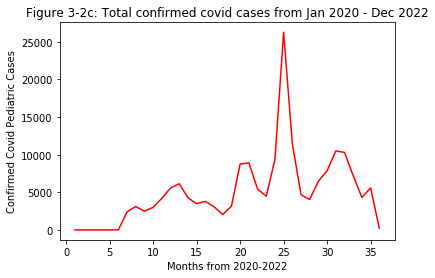

In [35]:
'''Pediatric CASES COVID'''
#plot covid admitance thorugh entire time line for x axis
months = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36]

#Y axis to plot 
pediatric_confirm = month_year_group_shifted['previous_day_admission_pediatric_covid_confirmed']
#plot and make pretty
pediatric_confirm_yeasterday = plt.plot(months,pediatric_confirm, color="red", label="Pediatric Confirm Covid")
plt.title("Figure 3-2c: Total confirmed covid cases from Jan 2020 - Dec 2022")
plt.xlabel("Months from 2020-2022")
plt.ylabel("Confirmed Covid Pediatric Cases")
#show the chart
plt.savefig("output/3-2c.png")
plt.show()

The r-value is: 0.502470976097904


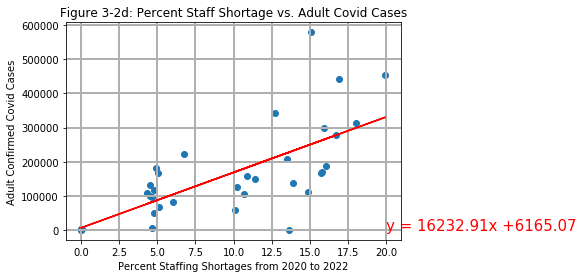

In [36]:
#create scatter plot shortage vs adult covid cases

plt.scatter(shortage_percent_today,adult_confirm)

# Incorporate the other graph properties
plt.title("Figure 3-2d: Percent Staff Shortage vs. Adult Covid Cases")
plt.xlabel('Percent Staffing Shortages from 2020 to 2022')
plt.ylabel('Adult Confirmed Covid Cases')
# add dot size and color outline 
plt.grid(linestyle='-', linewidth=2)

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(shortage_percent_today, adult_confirm)
regress_values = shortage_percent_today * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))


plt.plot(shortage_percent_today,regress_values,"r-")
# Label plot and annotate the line equation

plt.annotate(line_eq,(20,15),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")

# Show plot
plt.savefig("output/3-2d.png")
plt.show()

The r-value is: 0.08722342288547885


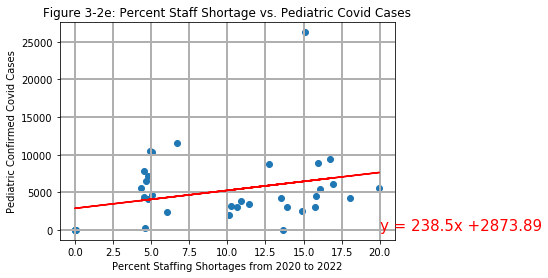

In [37]:
#create scatter plot shortage vs pediatric covid cases

plt.scatter(shortage_percent_today,pediatric_confirm)

# Incorporate the other graph properties
plt.title("Figure 3-2e: Percent Staff Shortage vs. Pediatric Covid Cases")
plt.xlabel('Percent Staffing Shortages from 2020 to 2022')
plt.ylabel('Pediatric Confirmed Covid Cases')
# add dot size and color outline 
plt.grid(linestyle='-', linewidth=2)

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(shortage_percent_today, pediatric_confirm)
regress_values = shortage_percent_today * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))


plt.plot(shortage_percent_today,regress_values,"r-")
# Label plot and annotate the line equation

plt.annotate(line_eq,(20,15),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")

# Show plot
plt.savefig("output/3-2e.png")
plt.show()

# Hypotheses for section 4

## Hospitals per State vs. Shortages

Null Hypothesis 4-1: There is no relationship between the number of states in a hospital and average critical staffing shortage per state.

Alternative Hypothesis 4-1: There is a relationship seen the number of in a hospital, and the average critical staffing per state.

## Hospitals per State vs. Occupancy

Null Hypothesis 4-2: There is no relationship between the number of hospitals in a state and the % occupancy of inpatient beds

Alternative Hypothesis 4-2:There is a relationship between the number of hospitals in a state and the % occupancy of inpatient beds

In [ ]:
#CODE HERE

In [43]:
# Explore the Data and include critical staffing shortage, number of inpatient beds, and number of inpatient beds used for the new data frame
states_data = data[["state", "critical_staffing_shortage_today_yes", "inpatient_beds", "inpatient_beds_used"]]
states_data

,state,critical_staffing_shortage_today_yes,inpatient_beds,inpatient_beds_used
0,ME,1,3229.0,2231.0
1,SD,2,2868.0,1641.0
2,MD,2,11827.0,9635.0
3,RI,6,2402.0,2445.0
4,ID,4,3694.0,2268.0
...,...,...,...,...
54006,MT,6,2938.0,1762.0
54007,NJ,9,21569.0,15395.0
54008,NM,12,4446.0,3181.0
54009,NE,9,4368.0,2958.0


In [44]:
# Average the data by state
avg_states_data = states_data.groupby(["state"]).mean().head(100)
avg_states_data.head()

,critical_staffing_shortage_today_yes,inpatient_beds,inpatient_beds_used
state,,,
AK,1.632114,1600.081301,1084.013211
AL,15.566604,13320.209193,10315.438806
AR,12.816184,8358.250749,5763.789211
AS,0.006452,150.000000,67.913978
AZ,16.815920,14717.461692,10900.769154


In [45]:
# Find number of states included in the table
len(avg_states_data.index)

54

In [47]:
# Import new table with the number of states
number = pd.read_csv("Resources/state_hospital.csv")
number

,state,number of hospitals
0,AK,11
1,AL,90
2,AR,52
3,AS,1
4,AZ,76
5,CA,339
6,CO,59
7,CT,35
8,DC,7
9,DE,8


In [48]:
## Get rid of the states that are not included in the other table
nn = number.drop([12,27], axis = 0)
nn

,state,number of hospitals
0,AK,11
1,AL,90
2,AR,52
3,AS,1
4,AZ,76
5,CA,339
6,CO,59
7,CT,35
8,DC,7
9,DE,8


In [49]:
# Strip the extra blanks within the graphs so it can work when merging
nn['state'] = nn['state'].str.strip()
nn

,state,number of hospitals
0,AK,11
1,AL,90
2,AR,52
3,AS,1
4,AZ,76
5,CA,339
6,CO,59
7,CT,35
8,DC,7
9,DE,8


In [50]:
# Move state to index for the data frame
state_hospitals = nn.set_index("state")
state_hospitals

,number of hospitals
state,
AK,11
AL,90
AR,52
AS,1
AZ,76
CA,339
CO,59
CT,35
DC,7


In [51]:
# Find the length of all the the new data frame
len(state_hospitals.index)

54

In [52]:
# Merge the data using pd.merge
combined_data = pd.merge(avg_states_data, state_hospitals, on = 'state', how = 'inner', indicator = False)
combined_data.head()

,critical_staffing_shortage_today_yes,inpatient_beds,inpatient_beds_used,number of hospitals
state,,,,
AK,1.632114,1600.081301,1084.013211,11
AL,15.566604,13320.209193,10315.438806,90
AR,12.816184,8358.250749,5763.789211,52
AS,0.006452,150.000000,67.913978,1
AZ,16.815920,14717.461692,10900.769154,76


In [53]:
# Find the length of rows for the combined data rows
len(combined_data.index)

54

In [54]:
# Convert the the type of data to float for number of hospitals
state_hospitals_df = state_hospitals.astype({'number of hospitals':'float'})
state_hospitals_df.head()

,number of hospitals
state,
AK,11.0
AL,90.0
AR,52.0
AS,1.0
AZ,76.0


In [55]:
# View the data frame for average states data
avg_states_data.head()

,critical_staffing_shortage_today_yes,inpatient_beds,inpatient_beds_used
state,,,
AK,1.632114,1600.081301,1084.013211
AL,15.566604,13320.209193,10315.438806
AR,12.816184,8358.250749,5763.789211
AS,0.006452,150.000000,67.913978
AZ,16.815920,14717.461692,10900.769154


In [56]:
# Use the join function to merge the two tables together
st_hosp_data = avg_states_data.join(state_hospitals_df)
st_hosp_data

,critical_staffing_shortage_today_yes,inpatient_beds,inpatient_beds_used,number of hospitals
state,,,,
AK,1.632114,1600.081301,1084.013211,11.0
AL,15.566604,13320.209193,10315.438806,90.0
AR,12.816184,8358.250749,5763.789211,52.0
AS,0.006452,150.000000,67.913978,1.0
AZ,16.815920,14717.461692,10900.769154,76.0
CA,53.813056,60895.349159,45195.508408,339.0
CO,10.094663,10495.660624,7079.485398,59.0
CT,1.430738,7979.054601,5988.456016,35.0
DC,0.241062,3337.307457,2584.858018,7.0


In [57]:
set(state_hospitals_df.index)

{'AK',
 'AL',
 'AR',
 'AS',
 'AZ',
 'CA',
 'CO',
 'CT',
 'DC',
 'DE',
 'FL',
 'GA',
 'HI',
 'IA',
 'ID',
 'IL',
 'IN',
 'KS',
 'KY',
 'LA',
 'MA',
 'MD',
 'ME',
 'MI',
 'MN',
 'MO',
 'MS',
 'MT',
 'NC',
 'ND',
 'NE',
 'NH',
 'NJ',
 'NM',
 'NV',
 'NY',
 'OH',
 'OK',
 'OR',
 'PA',
 'PR',
 'RI',
 'SC',
 'SD',
 'TN',
 'TX',
 'UT',
 'VA',
 'VI',
 'VT',
 'WA',
 'WI',
 'WV',
 'WY'}

In [58]:
st_hosp_data

,critical_staffing_shortage_today_yes,inpatient_beds,inpatient_beds_used,number of hospitals
state,,,,
AK,1.632114,1600.081301,1084.013211,11.0
AL,15.566604,13320.209193,10315.438806,90.0
AR,12.816184,8358.250749,5763.789211,52.0
AS,0.006452,150.000000,67.913978,1.0
AZ,16.815920,14717.461692,10900.769154,76.0
CA,53.813056,60895.349159,45195.508408,339.0
CO,10.094663,10495.660624,7079.485398,59.0
CT,1.430738,7979.054601,5988.456016,35.0
DC,0.241062,3337.307457,2584.858018,7.0


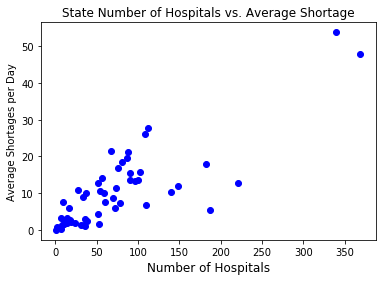

In [59]:
# Scatter plot of number of hospitals vs. avg shortage

marker_size=10
plt.scatter(st_hosp_data['number of hospitals'],st_hosp_data['critical_staffing_shortage_today_yes'], color="blue")
plt.title('State Number of Hospitals vs. Average Shortage')
plt.xlabel('Number of Hospitals',fontsize =12)
plt.ylabel('Average Shortages per Day')

plt.savefig("output/Figure4.1.png")



In [60]:
# Find the correlation between the number of hospitals and critical staffing shortage
correlation = st.pearsonr(st_hosp_data['number of hospitals'],st_hosp_data['critical_staffing_shortage_today_yes'])
print(f"The correlation between the number of hospitals in a state and the average average staffing shortages in a day is {round(correlation[0],2)}")

The correlation between the number of hospitals in a state and the average average staffing shortages in a day is 0.82


The r-squared is: 0.673


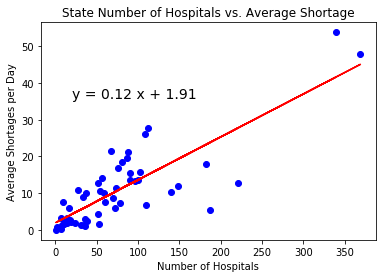

In [62]:
# Create regression line between state number of hospitals and the average shortages in a day for a state
(slope, intercept,rvalue, pvalue, stderr)= linregress(st_hosp_data["number of hospitals"],st_hosp_data["critical_staffing_shortage_today_yes"])
regress_values=st_hosp_data["number of hospitals"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(st_hosp_data["number of hospitals"],st_hosp_data["critical_staffing_shortage_today_yes"],color='b')
plt.plot(st_hosp_data["number of hospitals"], regress_values, color='red')
plt.annotate(line_eq,(20,36), fontsize=14)
plt.xlabel("Number of Hospitals")
plt.ylabel("Average Shortages per Day")
plt.title("State Number of Hospitals vs. Average Shortage")
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.savefig("output/Figure4.1.1.png")
plt.show()

In [63]:
# Number of hospitals quartiles and IQR
# Determine outliers using upper and lower bounds

st_hospital_numbers = st_hosp_data["number of hospitals"]

quartiles = st_hospital_numbers.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of number of states is: {lowerq}")
print(f"The upper quartile of number of states is: {upperq}")
print(f"The interquartile range of the number of states is: {iqr}")
print(f"The the median of the number of states is: {quartiles[0.5]} ")

# Determine outliers using upper and lower bounds

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values above {upper_bound} could be outliers.")

The lower quartile of number of states is: 20.25
The upper quartile of number of states is: 90.75
The interquartile range of the number of states is: 70.5
The the median of the number of states is: 55.0 
Values above 196.5 could be outliers.


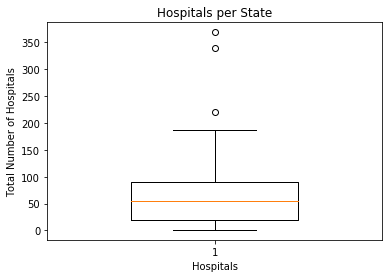

In [65]:
# Box plot to see which state of hospitals per state which are outliers
fig1, ax1 = plt.subplots()
ax1.set_title('Hospitals per State')
ax1.set_xlabel('Hospitals')
ax1.set_ylabel('Total Number of Hospitals')
ax1.boxplot(st_hospital_numbers, widths = 0.5, vert=True)
plt.savefig("output/Figure4.1.2.png")
plt.show()

In [66]:
# Print state hospital data
st_hosp_data

,critical_staffing_shortage_today_yes,inpatient_beds,inpatient_beds_used,number of hospitals
state,,,,
AK,1.632114,1600.081301,1084.013211,11.0
AL,15.566604,13320.209193,10315.438806,90.0
AR,12.816184,8358.250749,5763.789211,52.0
AS,0.006452,150.000000,67.913978,1.0
AZ,16.815920,14717.461692,10900.769154,76.0
CA,53.813056,60895.349159,45195.508408,339.0
CO,10.094663,10495.660624,7079.485398,59.0
CT,1.430738,7979.054601,5988.456016,35.0
DC,0.241062,3337.307457,2584.858018,7.0


In [67]:
# Find states with hospital numbers greater than the outlier
df1=st_hosp_data[st_hosp_data['number of hospitals']>196.5]

In [68]:
# Set as index
df2=list(df1.head().index)

In [69]:
# Identify the outlier states
print(df2)

['CA', 'FL', 'TX']


In [70]:
# Create column that shows the percentage of inpatient beds used
st_hosp_data['percentage_beds_occupied'] = st_hosp_data['inpatient_beds_used'] / st_hosp_data['inpatient_beds'] * 100

In [71]:
# Show data frame with the new column
st_hosp_data.head()

,critical_staffing_shortage_today_yes,inpatient_beds,inpatient_beds_used,number of hospitals,percentage_beds_occupied
state,,,,,
AK,1.632114,1600.081301,1084.013211,11.0,67.747383
AL,15.566604,13320.209193,10315.438806,90.0,77.442018
AR,12.816184,8358.250749,5763.789211,52.0,68.959276
AS,0.006452,150.000000,67.913978,1.0,45.275986
AZ,16.815920,14717.461692,10900.769154,76.0,74.066910


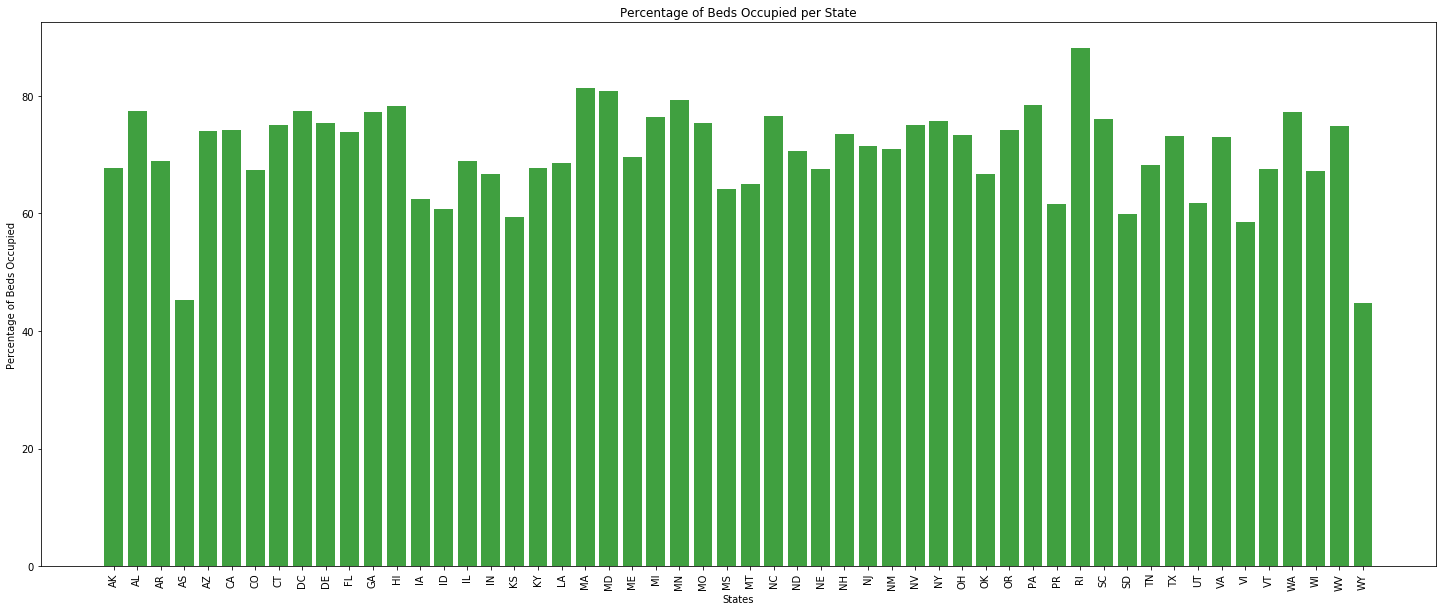

In [72]:
# Create bar graph to compare the percentages of beds occupied by states
x_axis = st_hosp_data.index.values
y_axis = st_hosp_data['percentage_beds_occupied'].values

# Create a Pyplot bar plot based off of the group series from before and label the title
plt.bar(x_axis,y_axis,color='g', alpha=0.75, align='center')

# Set the xlabel and ylabel, title using class methods
plt.title("Percentage of Beds Occupied per State")
plt.xlabel("States")
plt.ylabel("Percentage of Beds Occupied")
plt.xticks(rotation="vertical")
plt.gcf().set_size_inches(25,10)
plt.savefig("output/Figure4.2.png")
plt.show()

In [73]:
# Number of hospitals quartiles and IQR
# Determine outliers using upper and lower bounds

st_hospital_percentage = st_hosp_data["percentage_beds_occupied"]

quartiles2 = st_hospital_percentage.quantile([.25,.5,.75])
lowerq2 = quartiles2[0.25]
upperq2 = quartiles2[0.75]
iqr2 = upperq2-lowerq2

print(f"The lower quartile of number of states is: {lowerq2}")
print(f"The upper quartile of number of states is: {upperq2}")
print(f"The interquartile range of the number of states is: {iqr2}")
print(f"The the median of the number of states is: {quartiles2[0.5]} ")

# Determine outliers using upper and lower bounds

lower_bound2 = lowerq2 - (1.5*iqr)
upper_bound2 = upperq2 + (1.5*iqr)

print(f"Values below {lower_bound2} could be outliers.")
print(f"Values above {upper_bound2} could be outliers.")

The lower quartile of number of states is: 67.33694758248134
The upper quartile of number of states is: 75.64293386354612
The interquartile range of the number of states is: 8.305986281064776
The the median of the number of states is: 72.2184249468376 
Values below -38.41305241751866 could be outliers.
Values above 181.39293386354612 could be outliers.


In [74]:
# Find the mean of the state's percentage of inpatient beds occupied
mean1 = st_hosp_data["percentage_beds_occupied"].mean()
mean1

70.48185775032218

In [75]:
# Find states with percentage values above the mean
dafr1=st_hosp_data[st_hosp_data['percentage_beds_occupied']>mean1]
dafr2=list(dafr1.head().index)
print(dafr2)

['AL', 'AZ', 'CA', 'CT', 'DC']


In [76]:
# Find states with percentage values below the mean
dafr_1=st_hosp_data[st_hosp_data['percentage_beds_occupied']<mean1]
dafr_2=list(dafr_1.head().index)
print(dafr_2)

['AK', 'AR', 'AS', 'CO', 'IA']


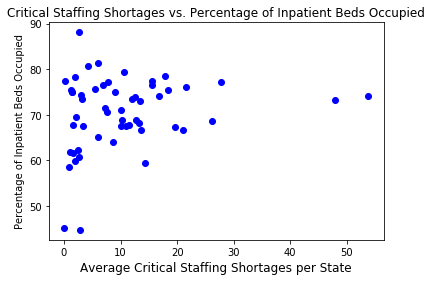

In [77]:
# Scatter plot of number of hospitals vs. avg shortage

marker_size=10
plt.scatter(st_hosp_data['critical_staffing_shortage_today_yes'],st_hosp_data['percentage_beds_occupied'], color="blue")
plt.title('Critical Staffing Shortages vs. Percentage of Inpatient Beds Occupied')
plt.xlabel('Average Critical Staffing Shortages per State',fontsize =12)
plt.ylabel('Percentage of Inpatient Beds Occupied')
plt.savefig("output/Figure4.2.1.png")